# 심층신경망(DNN, Deep Neural Network)

① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
카테고리 데이터, 더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

### ① 라이브러리 임포트

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

### ② 데이터 로드

In [2]:
# df = pd.read_csv('churn_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/churn_data.csv')

### ③ 데이터 분석

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<AxesSubplot:>

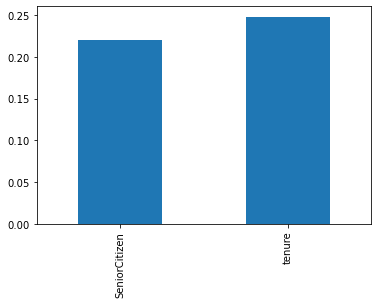

In [6]:
df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')

### ④ 데이터 전처리

In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
df['TotalCharges'].replace([' '], ['0'], inplace=True)

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

### 더미 특성 생성

In [11]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod']

In [12]:
dummies = pd.get_dummies(df[cols], drop_first=True)

In [13]:
df = df.drop(cols, axis=1)

In [14]:
df = pd.concat([df, dummies], axis=1)

In [15]:
# df = pd.get_dummies(df)
# cols = list(df.select_dtypes('object').columns)

### ⑤ Train, Test  데이터셋 분할

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [19]:
X_train.shape

(4930, 30)

In [20]:
y_train.shape

(4930,)

### 데이터 정규화/스케일링(Normalizing/Scaling)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 모델 입력갯수, 출력갯수 확인

In [23]:
X_train.shape

(4930, 30)

In [24]:
y_train.shape

(4930,)

### ⑦ 모델 구성

In [25]:
model = Sequential()

# input layer
model.add(Dense(64, activation='relu', input_shape=(30,)))

# hidden layer
model.add(Dense(64, activation='relu'))

# hidden layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

### 모델 구성 -  과적합 방지

In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

### 모델 확인

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [28]:
hidden1 = model.layers[0]

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
print(weights)

[[ 0.07805131 -0.06475793  0.17851852 ... -0.17326975  0.12140559
   0.10373129]
 [-0.18355693  0.07428049  0.06770067 ...  0.0849119   0.00692113
  -0.0606834 ]
 [ 0.16285755 -0.15311824  0.10382806 ...  0.07554771 -0.01873975
   0.00546695]
 ...
 [ 0.17103802  0.01891486  0.13395573 ...  0.08380376  0.1766579
   0.18439843]
 [ 0.17426823 -0.1860043  -0.06648739 ... -0.04474232 -0.0051488
   0.05049866]
 [-0.18879673  0.04706958 -0.16539343 ... -0.06996744 -0.06610167
   0.03122583]]


In [31]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


#### 모델 컴파일 – 이진 분류 모델

In [32]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델  
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 


- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

### 모델 훈련(학습) 하기

In [33]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=10)

Epoch 1/20
493/493 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7343 - val_loss: 0.4490 - val_accuracy: 0.7908
Epoch 2/20
493/493 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.7669 - val_loss: 0.4368 - val_accuracy: 0.7993
Epoch 3/20
493/493 [==============================] - 1s 2ms/step - loss: 0.4690 - accuracy: 0.7722 - val_loss: 0.4286 - val_accuracy: 0.7946
Epoch 4/20
493/493 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7838 - val_loss: 0.4293 - val_accuracy: 0.8022
Epoch 5/20
493/493 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7862 - val_loss: 0.4318 - val_accuracy: 0.7974
Epoch 6/20
493/493 [==============================] - 1s 2ms/step - loss: 0.4492 - accuracy: 0.7888 - val_loss: 0.4266 - val_accuracy: 0.7970
Epoch 7/20
493/493 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.7884 - val_loss: 0.4321 - val_accuracy: 0.8022
Epoch 

### 모델 훈련(학습) - 조기종료

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=25)

In [36]:
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', mode='min', 
                              save_best_only=True)

In [37]:
history = model.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
243/247 [============================>.] - ETA: 0s - loss: 0.4282 - accuracy: 0.8019
Epoch 00001: val_loss improved from inf to 0.41879, saving model to best_model.h5
247/247 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8024 - val_loss: 0.4188 - val_accuracy: 0.8017
Epoch 2/50
244/247 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.8064
Epoch 00002: val_loss did not improve from 0.41879
247/247 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8061 - val_loss: 0.4190 - val_accuracy: 0.7993
Epoch 3/50
237/247 [===========================>..] - ETA: 0s - loss: 0.4225 - accuracy: 0.8034
Epoch 00003: val_loss did not improve from 0.41879
247/247 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8030 - val_loss: 0.4190 - val_accuracy: 0.8027
Epoch 4/50
232/247 [===========================>..] - ETA: 0s - loss: 0.4164 - accuracy: 0.8091
Epoch 00004: val_loss did not improve f

225/247 [==========================>...] - ETA: 0s - loss: 0.3985 - accuracy: 0.8178
Epoch 00030: val_loss did not improve from 0.41817
247/247 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8168 - val_loss: 0.4341 - val_accuracy: 0.7970
Epoch 31/50
224/247 [==========================>...] - ETA: 0s - loss: 0.3997 - accuracy: 0.8123
Epoch 00031: val_loss did not improve from 0.41817
247/247 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8144 - val_loss: 0.4336 - val_accuracy: 0.7965
Epoch 32/50
227/247 [==========================>...] - ETA: 0s - loss: 0.4015 - accuracy: 0.8150
Epoch 00032: val_loss did not improve from 0.41817
247/247 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8154 - val_loss: 0.4334 - val_accuracy: 0.7989
Epoch 33/50
227/247 [==========================>...] - ETA: 0s - loss: 0.3959 - accuracy: 0.8145
Epoch 00033: val_loss did not improve from 0.41817
247/247 [==================

### ⑧ 모델 성능 평가

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.428208,0.802434,0.418795,0.801704
1,0.422162,0.806085,0.418960,0.799337
2,0.422052,0.803043,0.418985,0.802650
3,0.419442,0.806694,0.427009,0.803597
4,0.417203,0.807505,0.420746,0.802177


<AxesSubplot:>

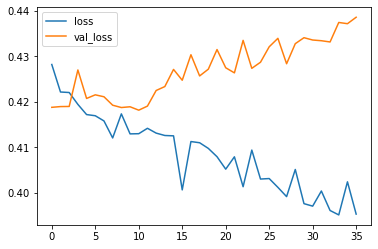

In [40]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

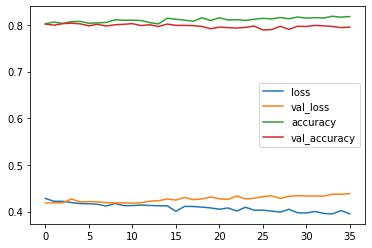

In [41]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.66      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.80      0.79      2113



In [45]:
print(confusion_matrix(y_test,predictions))

[[1385  154]
 [ 279  295]]
